# Intro to Pandas for Data Analysis/Machine Learning

Welcome to the course. At the end of this course you will be able to:

*   Compute high level statistics
*   Identify Outliers and understand their effect on analysis
*   Identify Null values and identify appropriate methods for dealing with them
*   Begin to understand Pandas and how it can be used to 





In [0]:
#Import Python libraries needed 
import pandas as pd
import numpy as np

#Matplotlib is used to create visualizations
import matplotlib.pyplot as plt

In [0]:
#Create a Pandas DataFrame from a csv file. For an excel file you can use pd.read_excel
data = pd.read_csv('/content/cannabisGrowthRaw2020 (1).csv')

#show the first few rows of data to check the upload was completed
data.head()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,good


The first step will be to check the data to see what kind of information is included. 

```
data.info()
```
This function will return how many rows of data are in the dataset, what columns (features) are included, what datatype the values are, and if there are any null values.


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PMCno     1458 non-null   float64
 1   DBH       1470 non-null   float64
 2   Ht        1470 non-null   float64
 3   Surv      1284 non-null   float64
 4   Vig       1334 non-null   float64
 5   Ins_res   1334 non-null   float64
 6   Stem_Fm   1334 non-null   float64
 7   Crown_Fm  1334 non-null   float64
 8   Brnch_Fm  1334 non-null   float64
 9   Utility   1472 non-null   object 
dtypes: float64(9), object(1)
memory usage: 115.1+ KB


How many rows of data are there in this dataset?

How many different datatypes are there?

Uh-oh, there appears to be some null (empty) values. We'll come back to those in a little bit, but note which columns contain these nulls.

We can see there are 10 columns or features. 

There are also 2 datatypes: float64 and object.

**Float64** values are numbers that contain a decimal point (e.g. 3.54)

**Object** values contain alphanumeric values or text 

Other data types you may come across:

**Int64** are whole numbers (integers) (e.g. 3, 5, 10, 232)

**bool** (short for Boolean) contains True/False

**category** contains a finite list of values

Now that we know a little more about the data, let's figure out some statistics that may help give us a high level understanding of what's included in the data

In [0]:
#Compute high-level statistics
data.describe()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
count,1458.000000,1470.000000,1470.000000,1284.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,2136.977366,75.865518,9.674565,62.059579,3.159520,2.966417,3.083208,3.282159,2.905547
std,648.661372,1614.500903,4.297192,32.247227,1.041356,0.838065,0.760061,0.778459,0.811572
min,1.000000,0.580000,1.000000,1.500000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,1595.000000,8.600000,6.145000,38.000000,2.500000,2.500000,3.000000,3.000000,2.500000
50%,2426.000000,15.000000,9.285000,66.000000,3.000000,3.000000,3.000000,3.300000,3.000000
75%,2656.000000,21.982500,12.300000,88.000000,4.000000,3.500000,3.700000,4.000000,3.300000
max,3537.000000,45452.000000,24.000000,108.000000,5.000000,5.000000,5.000000,5.000000,5.000000




```data.describe()``` is the method that will compute all there great statistics. 

**!** Are there any features that are missing from the above table?



In [0]:
data['Vig'].astype('category')
data['Vig'].dtype()

TypeError: ignored

good       428
none       360
average    260
low        214
best       210
Name: Utility, dtype: int64

(array([428.,   0., 210.,   0.,   0., 214.,   0., 260.,   0., 360.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

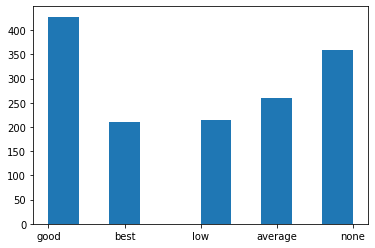

In [0]:
#Show how many rows contain each value for the feature 'Utility'
display(data['Utility'].value_counts())

plt.hist(data['Utility'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  6.,   0.,   0., 202., 374., 127.,  77., 549.,  60.,  63.]),
 array([1.0000e+00, 3.5460e+02, 7.0820e+02, 1.0618e+03, 1.4154e+03,
        1.7690e+03, 2.1226e+03, 2.4762e+03, 2.8298e+03, 3.1834e+03,
        3.5370e+03]),
 <a list of 10 Patch objects>)

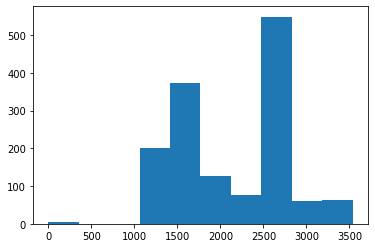

In [0]:
#Now create a histogram to show the values for the feature PMCno
plt.hist(data['PMCno'])

# Spiders Georg is an outlier and should not be counted (or should he?)

**What are outliers?**

Basically, outliers are data points that are significantly different from other datapoints. Outliers can have a major effect on any analysis you want to conduct.

*'The average person eats 3 spiders a year' factoid is actually just statistical error. The average person eats 0 spiders per year. Spiders Georg, who lives in cave & eats over 10,000 each day, is an outlier and should not have been counted*

Unfortunately, there's no one way to deal with outliers. Depending on the business question(s) you may want to remove outliers completely, leave them in, or remove them and perform a separate analysis.

In [0]:
#Import Boston Housing Pricing dataset
from sklearn.datasets import load_boston
boston = load_boston()
columns = boston.feature_names

boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns

boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


One way to identify outliers is to create a scatter plot.

KeyError: ignored

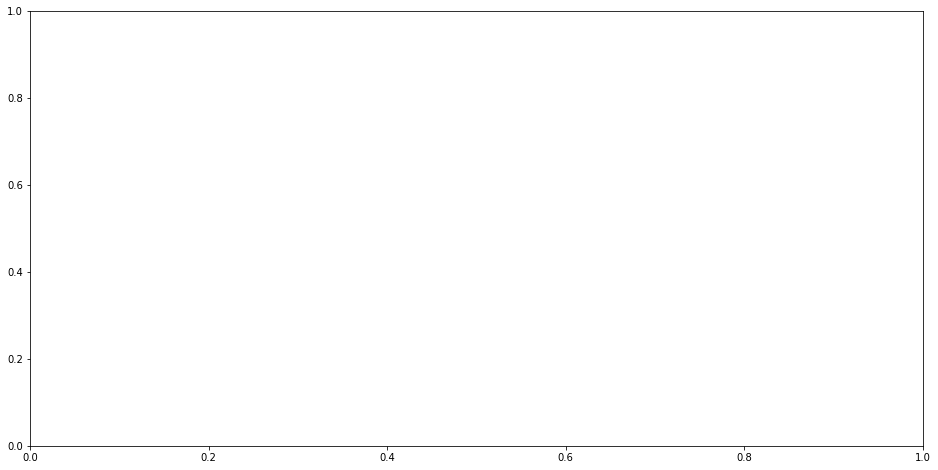

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['MEDV'], boston_df['TAX'])
ax.set_xlabel('Average number of rooms')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [0]:
#Summary of N/A Values
data.isnull().sum()

PMCno        14
DBH           2
Ht            2
Surv        188
Vig         138
Ins_res     138
Stem_Fm     138
Crown_Fm    138
Brnch_Fm    138
Utility       0
dtype: int64

In [0]:
#Drop rows where all cells in that row is NA
data_cleaned = data.dropna(how='all',axis=0).reset_index(drop = True)
data_cleaned

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,good
...,...,...,...,...,...,...,...,...,...,...
1467,2548.0,41.63,12.64,28.0,4.2,3.2,2.3,1.9,1.7,average
1468,2552.0,33.35,10.61,33.0,4.5,4.0,2.8,3.0,1.5,good
1469,2568.0,28.21,9.47,94.0,4.6,3.0,2.0,1.8,1.2,good
1470,1522.0,27.36,11.49,67.0,4.7,3.3,3.4,3.4,3.0,good


In [0]:
#Drop missing observations and reset index
data_no_missing = data.dropna().reset_index(drop = True)
data_no_missing

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,good
...,...,...,...,...,...,...,...,...,...,...
1277,2621.0,5.98,4.03,43.0,2.5,2.0,3.3,4.0,3.5,average
1278,2548.0,41.63,12.64,28.0,4.2,3.2,2.3,1.9,1.7,average
1279,2552.0,33.35,10.61,33.0,4.5,4.0,2.8,3.0,1.5,good
1280,2568.0,28.21,9.47,94.0,4.6,3.0,2.0,1.8,1.2,good


In [0]:
#Replace NA with Mean, inplace=True means that the changes are saved to the df right away
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df.reset_index(drop = True)